In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [27]:
columns = ["user_id", "item_id", "rating", "timestamp"]
# Function to read textfile dataset and load it as a Pandas DataFrame
def loadData(file, columns):
    df = pd.read_table(file, sep='\t')
    df.columns = columns
    return df

u_data = loadData("C:\\Users\\Onur\\Desktop\\ml-100k\\u.data",columns)
u_data.head(5)

,user_id,item_id,rating,timestamp
0,186,302,3,891717742
1,22,377,1,878887116
2,244,51,2,880606923
3,166,346,1,886397596
4,298,474,4,884182806


In [28]:
u_data.shape

(99999, 4)

In [29]:
print("The number of unique users in the data: ", u_data['user_id'].nunique())
print("The number of unique movies in the data: ", u_data['item_id'].nunique())
print("The number of unique ratings in the data: ", u_data['rating'].nunique())
print("The number of unique timestamps in the data: ", u_data['timestamp'].nunique())

The number of unique users in the data:  943
The number of unique movies in the data:  1682
The number of unique ratings in the data:  5
The number of unique timestamps in the data:  49282


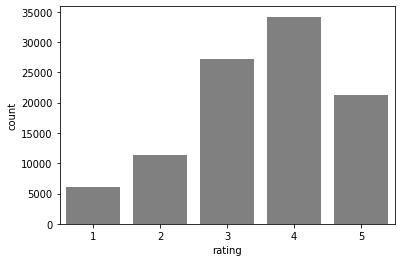

In [30]:
# Examine the distribution of movie ratings
import matplotlib.pyplot as plt
#pd.options.display.mpl_style = 'default'
# u_data['rating'].plot(kind='hist')
sns.countplot(u_data['rating'], color='gray')

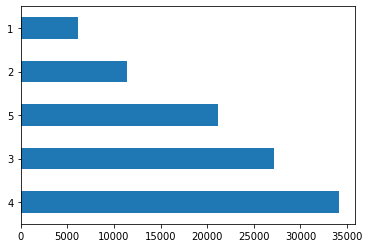

In [31]:
u_data['rating'].value_counts().plot(kind='barh')

In [32]:
tempData = u_data[['user_id', 'item_id', 'rating']]
tempData.head(5)

,user_id,item_id,rating
0,186,302,3
1,22,377,1
2,244,51,2
3,166,346,1
4,298,474,4


In [33]:
#userItemDF = pd.pivot_table(data = tempData,
#                            index='user_id', columns='item_id', fill_value='rating')
#userItemDF.head()

userItemDF = pd.pivot_table(data = tempData, 
                            index='user_id', 
                            columns='item_id',
                            fill_value=0,
                            values = 'rating')

userItemMatrix = userItemDF.apply(func= lambda x: x - np.mean(x), axis = 1)
userItemMatrix = userItemDF.values.astype(float)
userItemMatrix.shape

(943, 1682)

In [34]:
userItemMatrix[:5,:]

array([[5., 3., 4., ..., 0., 0., 0.],
       [4., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [4., 3., 0., ..., 0., 0., 0.]])

In [35]:
print("Shape of the user item matrix: ", userItemDF.shape)

Shape of the user item matrix:  (943, 1682)


In [36]:
## Number of ratings by user
top_users = np.sum(userItemMatrix, axis = 1).argsort()[-10:][::-1]
top_bought_bonds =  np.sum(userItemMatrix, axis = 0).argsort()[-10:][::-1]

In [37]:
userItemDF.iloc[top_users].index

Int64Index([450, 655, 13, 416, 276, 303, 7, 846, 59, 234], dtype='int64', name='user_id')

In [38]:
cnt_of_zero_cells = np.sum(userItemMatrix == 0)
cnt_of_one_cells = np.sum(userItemMatrix >= 0)
print("sparsity percentage: ", cnt_of_zero_cells/(cnt_of_zero_cells + cnt_of_one_cells))

sparsity percentage:  0.4837254614121949


In [39]:
from scipy.sparse.linalg import svds
from sklearn.decomposition import TruncatedSVD, NMF
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds

In [40]:
U, s, Vt = svds(userItemMatrix, k=150)
Vt.shape

(150, 1682)

In [41]:
#corrDF = pd.DataFrame(data = np.corrcoef(item_matrix), columns=userItemDF.columns)
from sklearn.metrics.pairwise import cosine_similarity
corrDF = cosine_similarity(X = Vt.T)
corrDF.shape
corrDF = pd.DataFrame(data=corrDF, columns=userItemDF.columns, index=userItemDF.columns)
# Columns = items, indexes =. users .... use latter for user-user
corrDF.head()

item_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
item_id,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.040109,-0.010311,0.025244,-0.056239,0.031500,-0.006896,-0.018654,0.014580,0.059609,...,0.038575,-0.024017,-0.050575,-0.050575,0.033138,0.049797,0.049797,0.049797,0.016134,0.052618
2,0.040109,1.000000,-0.016780,0.065758,-0.042892,0.126013,-0.002664,-0.094529,-0.004159,0.016922,...,0.105296,-0.110598,-0.052890,-0.052890,0.029045,-0.043946,-0.043946,-0.043946,0.019092,0.009707
3,-0.010311,-0.016780,1.000000,-0.012935,-0.071125,-0.018411,-0.023646,-0.026627,0.021597,0.056490,...,0.092386,0.063366,-0.005213,-0.005213,0.173008,0.021112,0.021112,0.021112,-0.067158,0.070885
4,0.025244,0.065758,-0.012935,1.000000,0.007296,-0.062350,-0.048994,0.003986,0.102691,-0.024588,...,-0.004088,-0.051162,0.110311,0.110311,-0.047873,0.000813,0.000813,0.000813,-0.011099,0.044613
5,-0.056239,-0.042892,-0.071125,0.007296,1.000000,0.042605,-0.052533,0.000499,0.024171,-0.145256,...,-0.062187,-0.020264,0.007201,0.007201,-0.052948,-0.002688,-0.002688,-0.002688,0.040368,0.226578


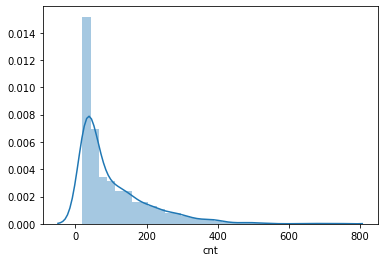

In [42]:
tempDF = u_data.groupby("user_id")["item_id"].count().reset_index()
tempDF.columns = ["user_id", "cnt"]
sns.distplot(tempDF["cnt"])
#tempDF["cnt"] >=

In [43]:
user_list = u_data["user_id"].tolist()

random_index = np.random.randint(low = 0, high=len(user_list), size = 1)[0]

#random_index = np.random.randint(low = 0, high=len(user_list), size = 1)[0]
counter_user_id = user_list[random_index]
rating_list = list(u_data[u_data["user_id"] == counter_user_id]["rating"])
item_list = list(u_data[u_data["user_id"] == counter_user_id]["item_id"])
''' Getting random users and ratings made'''
item_rating_info = list(zip(item_list, rating_list))
print("Counter party ", counter_user_id)
#print("Ratings: ", item_rating_info)
not_rated_items = list(set(userItemDF.columns) - set(item_list))
random_item_index = np.random.randint(low = 0, high = len(not_rated_items), size = 1)[0]
print("want to rate item: ", not_rated_items[random_item_index])


item_rating_similarity_list = []
for item, rat in item_rating_info:
    item_rating_similarity_list.append((item, rat, corrDF.loc[not_rated_items[random_item_index]][item]))

item_rating_similarity_list

Counter party  774
want to rate item:  129


[(1091, 1, -0.004570871878082471),
 (1419, 1, -0.02045537556857485),
 (195, 3, -0.01888521439582638),
 (739, 2, 0.009988396268363682),
 (920, 2, -0.028285395871163042),
 (511, 3, 0.038306065748869134),
 (576, 1, 0.08713043995130428),
 (527, 1, 0.09075574887140694),
 (89, 2, 0.03074838584659732),
 (294, 1, 0.050150358725096114),
 (229, 2, 0.039706806287483784),
 (403, 2, 0.1359684794390428),
 (673, 2, -0.08760065342679248),
 (54, 1, -0.050210801594260154),
 (172, 3, -0.004652627548612779),
 (644, 4, -0.08187425285712303),
 (1028, 2, -0.05981421451751719),
 (563, 1, -0.036853210815994325),
 (127, 4, -0.04404508435931873),
 (28, 3, -0.005200250068105987),
 (185, 2, 0.014527185567996204),
 (871, 1, -0.1564975402063807),
 (52, 3, -0.10972948628059609),
 (105, 1, -0.0024537770936152448),
 (520, 3, 0.020875636836696715),
 (179, 5, -0.02163052243087014),
 (238, 5, -0.010876563467032896),
 (208, 2, 0.09744403034810915),
 (672, 1, 0.1257731055189866),
 (1182, 1, -0.06898699278613836),
 (31, 1, -

In [44]:
recommended_score = 0.0
for item, rat, similarity_score in item_rating_similarity_list:
    recommended_score += (similarity_score * rat)

recommended_score/sum([score for _, _, score in item_rating_similarity_list])

1.716502074363569

In [46]:
columns_1 = ["movie id", "movie title", "release date", "video release date",
              "IMDb URL","unknown", "Action", "Adventure", "Animation",
              "Children's", "Comedy" ,"Crime" , "Documentary", "Drama", "Fantasy" ,
              "Film-Noir","Horror" ,"Musical", "Mystery","Romance", "Sci-Fi",
              "Thriller", "War","Western"]
# Function to read textfile dataset and load it as a Pandas DataFrame
def loadData(file, columns):
    df = pd.read_table(file, sep='|', encoding='utf-8')
    df.columns = columns
    return df

#u_data = loadData(r"/Users/patrick.orourke/Desktop/ml-100k/u.item",columns)
#u_data.head(5)

itemdf = pd.read_table(r"C:\\Users\\Onur\\Desktop\\ml-100k\\u.item", sep="|", encoding='latin-1', 
              header=None)
itemdf.columns = columns_1
itemdf.head()

#list() + list(itemdf.columns[5:])
selectedCols = [itemdf.columns[0]] + list(itemdf.columns[5:])
#[1] + [2, 3]
itemdfTemp = itemdf[selectedCols]
print(itemdfTemp.head(5))

   movie id  unknown  Action  Adventure  Animation  Children's  Comedy  Crime  \
0         1        0       0          0          1           1       1      0   
1         2        0       1          1          0           0       0      0   
2         3        0       0          0          0           0       0      0   
3         4        0       1          0          0           0       1      0   
4         5        0       0          0          0           0       0      1   

   Documentary  Drama  Fantasy  Film-Noir  Horror  Musical  Mystery  Romance  \
0            0      0        0          0       0        0        0        0   
1            0      0        0          0       0        0        0        0   
2            0      0        0          0       0        0        0        0   
3            0      1        0          0       0        0        0        0   
4            0      1        0          0       0        0        0        0   

   Sci-Fi  Thriller  War  Wester

In [47]:
itemdf.loc[itemdf["movie id"] == 111, "movie title"].iloc[0]

'Truth About Cats & Dogs, The (1996)'

In [48]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=4, n_jobs=-1)
neighFit = neigh.fit(itemdfTemp) 
distance, neighb = neighFit.kneighbors(itemdfTemp)
print(neighb.shape)
neighb

(1682, 4)


array([[   0,    7,    3,   12],
       [   1,    2,   20,   16],
       [   2,   10,   11,   22],
       ...,
       [1679, 1661, 1544, 1440],
       [1680, 1667, 1663, 1658],
       [1681, 1677, 1676, 1675]], dtype=int64)

In [96]:
# Want to find the movies similar to movie_ID = 99 based on similar movie genres
movie_list = u_data["item_id"].tolist()

random_index = np.random.randint(low = 0, high=len(movie_list), size = 1)[0]

#random_index = np.random.randint(low = 0, high=len(user_list), size = 1)[0]
random_movie_id = movie_list[random_index]
random_movie_name =  itemdf.loc[itemdf["movie id"] == random_movie_id, "movie title"].iloc[0]
print("Want to predict movie: ", random_movie_name)

similar_movies_ids = neighb[random_movie_id,1::]
similar_movies_names = [itemdf.loc[itemdf["movie id"] == i, "movie title"].iloc[0] for i in similar_movies_ids]
print("Similar movies based on movie genres: ", similar_movies_names)

#tempData[tempData["user_id"] == random_user_id]

Want to predict movie:  Scream (1996)
Similar movies based on movie genres:  ['Pocahontas (1995)', 'Wild Bill (1995)', 'English Patient, The (1996)']
